epoch : 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch : 100, cost: 0.420221, W: -1.451281, b: 4.406925
epoch : 200, cost: 0.398721, W: -1.898433, b: 5.773750
epoch : 300, cost: 0.390820, W: -2.174322, b: 6.609553
epoch : 400, cost: 0.387009, W: -2.367329, b: 7.191599
epoch : 500, cost: 0.384924, W: -2.510626, b: 7.622530
epoch : 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch : 700, cost: 0.382944, W: -2.707397, b: 8.212804
epoch : 800, cost: 0.382463, W: -2.776597, b: 8.420023
epoch : 900, cost: 0.382149, W: -2.832521, b: 8.587363
epoch : 1000, cost: 0.381941, W: -2.878112, b: 8.723699
epoch : 1100, cost: 0.381801, W: -2.915530, b: 8.835541
epoch : 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch : 1300, cost: 0.381641, W: -2.971979, b: 9.004180
epoch : 1400, cost: 0.381596, W: -2.993242, b: 9.067673
epoch : 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch : 1600, cost: 0.381543, W: -3.025776, b: 9.164800
epoch : 1700, cost: 0.381528, W: -3.038172, b: 9.201797
epoc

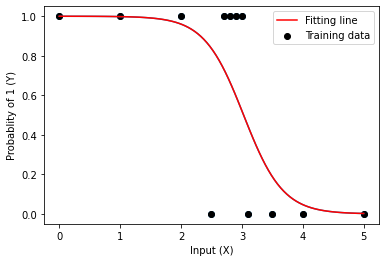

[[-3.10385775]] [9.3977674]
[0 1]
[[-3.10385806]] [9.39776831]
[0 1]


In [ ]:
import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]) # 2 dimension
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]]) # 2dimension

W = torch.zeros(1,1, requires_grad=True) # 학습하려 하는 애
b = torch.zeros(1,1, requires_grad=True) # 경사도를 계산하겠다! 를 여기서 해줄 수 있음

lr = 1.0

for epoch in range(3001):
  ## W, b 가 경사도가 계산이 되어야 한다
  # W.requires_grad_(True) 
  # b.requires_grad_(True) 위에 초기화 할떄 같이 해줄 수 있음

  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b) # 시그모이드에 구현이 되어 있으므로 사용
  # cost는 Cross Entropy
  cost = torch.mean(
      -y_train * torch.log(hypothesis)
      -(1 - y_train) * torch.log(1 - hypothesis)
  )

  # 옵티마이저 모듈 사용
  optimizer = torch.optim.SGD([W,b], lr=1.0) # 제일 정확한 그림 인 것 같음, stochastic gradient descent 방식, 밑 부분이랑 똑같음(W, b 업데이트 두줄과 같음)
  # optimizer = torch.optim.Adam([W,b], lr=1.0)
  # optimizer = torch.optim.Adadelta([W,b])
  # optimizer = torch.optim.Adagrad([W,b])
  # optimizer = torch.optim.RMSprop([W,b])

  # cost.backward()
  # with torch.no_grad() as grd: # 기울기 계산 기능을 끈 다음에
  #   W = W - lr * W.grad # W update
  #   b = b - lr * b.grad # b update

  optimizer.zero_grad() # 모든 파라미터의 경사도를 0으로 초기화
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:  ## 학습 후 출력
      print( f'epoch : {epoch}, cost: {cost.item():.6f}, W: {W.squeeze():.6f}, b: {b.item():.6f}')

# x가 4.5, 1.1 일 때는 값이 얼마 일까?
x_test = torch.FloatTensor([[4.5],[1.1]])
y_test = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(y_test)) ## 예상 결과 알 수 있음 -> round 함수로 반올림
test_result = torch.sigmoid(torch.mm(x_test, W) + b) # .mm -> 행렬곱
print(torch.round(test_result))

import matplotlib.pyplot as plt

W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train)

X = torch.linspace(0,5,100).unsqueeze(1) # linspace -> 0부터 5까지 100개로 쪼개라, unsqueeze(1) 모양 맞추기
Y = torch.sigmoid(torch.mm(X,W) + b)
plt.plot(X,Y)
plt.ylabel("Probablity of 1 (Y)")
plt.xlabel("Input (X)")
plt.scatter(x_train, y_train, c='black', label="Training data")
plt.plot(X,Y, c='#ff0000', label = "Fitting line")
plt.legend()
plt.show()

from sklearn.linear_model import LogisticRegression # 선형회귀 학습 한줄로 끝내기

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = [1,1,1,0,0,0,0,1,0,1,1,1]

model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)

print(model.coef_, model.intercept_) ## (W, b)

x_test = [[4.5], [1.1]]
test_result = model.predict(x_test)
print(test_result)


from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1] # 입력 shape이 pytorch에서와 다름에 주의!

model = LogisticRegression(penalty='none') # penalty (or regularization)은 추후 설명
model.fit(x_train, y_train)

#W와 b에 해당하는 값 출력 
print(model.coef_, model.intercept_)

# 새로운 x값이 주어질 때 y값 예측해보기 
x_test = [[4.5],[1.1]]
test_result = model.predict(x_test) 
print(test_result)